<a href="https://colab.research.google.com/github/Elavat9000/TelecomX_LATAM_challenge2-data-science-LATAM/blob/main/TelecomX_Intento2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

###  Carga el JSON desde el archivo en GitHub







In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [4]:
datos = pd.read_json(url)
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [5]:
df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

df = pd.concat([datos[['customerID','Churn']],df_customer, df_phone, df_internet, df_account], axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##Conocer contenido de columnas

In [6]:
columnasnumericas = [
    'Churn', 'gender', 'SeniorCitizen','Partner', 'Dependents',
    'PhoneService','InternetService', 'MultipleLines', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'PaymentMethod', 'Contract','OnlineSecurity']

In [7]:
for col in columnasnumericas:
    print(f"{col}: {df[col].unique()}")

Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
InternetService: ['DSL' 'Fiber optic' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Contract: ['One year' 'Month-to-month' 'Two year']
OnlineSecurity: ['No' 'Yes' 'No internet service']


##Convierte en float los numero de charges total y quita espacion en blanco

In [8]:
import numpy as np

In [9]:
df['Charges.Total'] = df['Charges.Total'].str.replace(' ', '', regex=True)
df['Charges.Total'] = df['Charges.Total'].replace('', np.nan)
df['Charges.Total'] = df['Charges.Total'].astype(float)
df['Charges.Total'].isnull().sum()

np.int64(11)

In [10]:
df['Charges.Total'] = df['Charges.Total'].fillna(0)
df['Charges.Total'].isnull().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##Limpia churn quitando el espacio en blanco

In [12]:
df_clean = df.query("Churn != ''")
df = df_clean
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

##Convierte las letras en minusculas y quita guiones medios

In [13]:
df[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']] = df[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']].apply(lambda col: col.str.lower())
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.6,593.30
1,0003-mknfe,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,No,Yes,month-to-month,No,mailed check,59.9,542.40
2,0004-tlhlj,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,No,No,month-to-month,Yes,electronic check,73.9,280.85
3,0011-igkff,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,Yes,Yes,month-to-month,Yes,electronic check,98.0,1237.85
4,0013-exchz,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,Yes,No,month-to-month,Yes,mailed check,83.9,267.40


In [14]:
df[['customerID','gender', 'InternetService', 'PaymentMethod']] = df[['customerID','gender', 'InternetService', 'PaymentMethod']].applymap(lambda x: x.replace('-','').replace(',',''.strip()))
df['Contract'] = df['Contract'].apply(lambda x: x.replace('-',' '))
df.head()

<ipython-input-14-2a64c2106757>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['customerID','gender', 'InternetService', 'PaymentMethod']] = df[['customerID','gender', 'InternetService', 'PaymentMethod']].applymap(lambda x: x.replace('-','').replace(',',''.strip()))


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002orfbo,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.6,593.30
1,0003mknfe,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,No,Yes,month to month,No,mailed check,59.9,542.40
2,0004tlhlj,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,No,No,month to month,Yes,electronic check,73.9,280.85
3,0011igkff,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,Yes,Yes,month to month,Yes,electronic check,98.0,1237.85
4,0013exchz,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,Yes,No,month to month,Yes,mailed check,83.9,267.40


## Mapea contenido para analisis


In [15]:
df['gender'] = df['gender'].map({'male': 0, 'female': 1})
df['InternetService'] = df['InternetService'].map({'no': 0, 'dsl': 1, 'fiber optic': 2})
df['Contract'] = df['Contract'].map({'month to month': 0, 'one year': 1, 'two year': 2})

In [16]:
cols_binarias = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling']

df[cols_binarias] = df[cols_binarias].replace({'Yes':1, 'No':0})


<ipython-input-16-8782ced08766>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_binarias] = df[cols_binarias].replace({'Yes':1, 'No':0})


In [17]:
mapeo_servicios = {
    'No': 0,
    'Yes': 1,
    'No internet service': 2,
    'No phone service': 2
}
columnas_servicios = ['MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','OnlineSecurity']

for col in columnas_servicios:
    df[col] = df[col].map(mapeo_servicios)

In [18]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,1,0,1,1,0,1,1,mailed check,65.6,593.30
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,0,0,0,0,1,0,0,mailed check,59.9,542.40
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,1,0,0,0,0,1,electronic check,73.9,280.85
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,1,0,1,1,0,1,electronic check,98.0,1237.85
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,0,1,1,0,0,1,mailed check,83.9,267.40


In [19]:
for col in columnasnumericas:
    print(f"{col}: {df[col].unique()}")

Churn: [0 1]
gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
PhoneService: [1 0]
InternetService: [1 2 0]
MultipleLines: [0 1 2]
OnlineBackup: [1 0 2]
DeviceProtection: [0 1 2]
TechSupport: [1 0 2]
StreamingTV: [1 0 2]
StreamingMovies: [0 1 2]
PaperlessBilling: [1 0]
PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
Contract: [1 0 2]
OnlineSecurity: [0 1 2]


##Creacion de cuentas diarias

In [20]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

In [33]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,0,1,1,65.6,593.30,2.186667,False,False,False,True
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,1,0,0,59.9,542.40,1.996667,False,False,False,True
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,0,1,73.9,280.85,2.463333,False,False,True,False
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,0,1,98.0,1237.85,3.266667,False,False,True,False
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,0,1,83.9,267.40,2.796667,False,False,False,True


##Creacion de mas tablas a partir de PaymentMethod, para simplificar analisis

In [21]:
df = pd.get_dummies(df, columns=['PaymentMethod'])

In [22]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,0,1,1,65.6,593.30,2.186667,False,False,False,True
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,1,0,0,59.9,542.40,1.996667,False,False,False,True
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,0,1,73.9,280.85,2.463333,False,False,True,False
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,0,1,98.0,1237.85,3.266667,False,False,True,False
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,0,1,83.9,267.40,2.796667,False,False,False,True


In [23]:
df[['PaymentMethod_mailed check',
    'PaymentMethod_bank transfer (automatic)',
      'PaymentMethod_credit card (automatic)',
      'PaymentMethod_electronic check']].sum()

,0
PaymentMethod_mailed check,1612
PaymentMethod_bank transfer (automatic),1544
PaymentMethod_credit card (automatic),1522
PaymentMethod_electronic check,2365


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   Churn                                    7043 non-null   int64  
 2   gender                                   7043 non-null   int64  
 3   SeniorCitizen                            7043 non-null   int64  
 4   Partner                                  7043 non-null   int64  
 5   Dependents                               7043 non-null   int64  
 6   tenure                                   7043 non-null   int64  
 7   PhoneService                             7043 non-null   int64  
 8   MultipleLines                            7043 non-null   int64  
 9   InternetService                          7043 non-null   int64  
 10  OnlineSecurity                           7043 non-nul

#📊 Carga y análisis

##Análisis exploratorio inicial

###Análisis Descriptivo

In [34]:
df.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,1.222916,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.778877,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,118.750000,8684.800000,3.958333


### Distribución de evasión (Clientes que cancelaron vs no)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

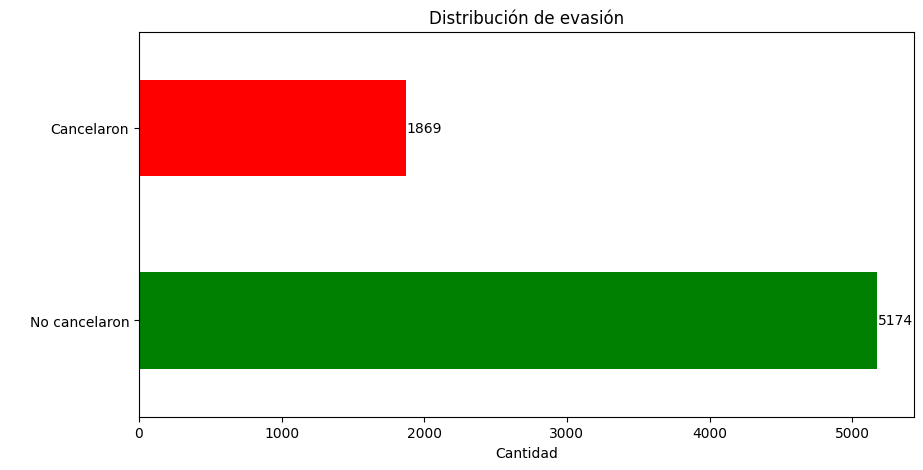

In [41]:
conteo = df['Churn'].value_counts().rename(index={0: 'No cancelaron', 1: 'Cancelaron'})

fig, ax = plt.subplots(figsize=(10,5))
conteo.plot(kind='barh', ax=ax, color=['green', 'red'])
plt.title('Distribución de evasión')
ax.set_xlabel('Cantidad')
ax.set_ylabel(' ')

# Mostrar los números al lado de cada barra
for i, (valor) in enumerate(conteo):
    ax.text(valor + 5, i, str(valor), color='black', fontsize=10, va='center')

plt.show()


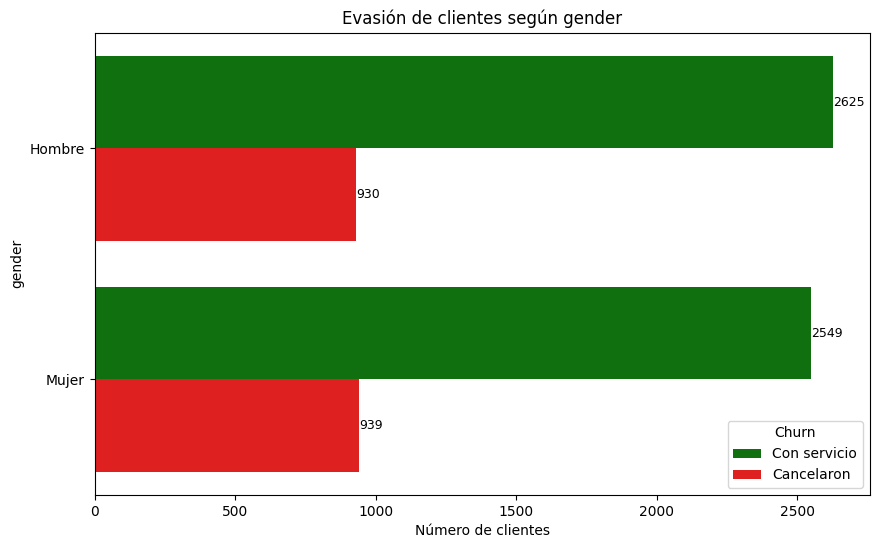


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



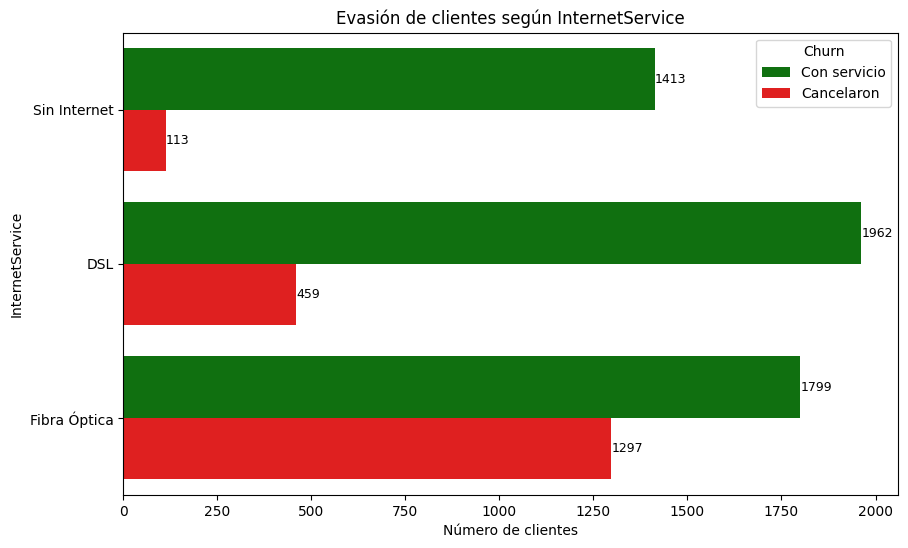


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



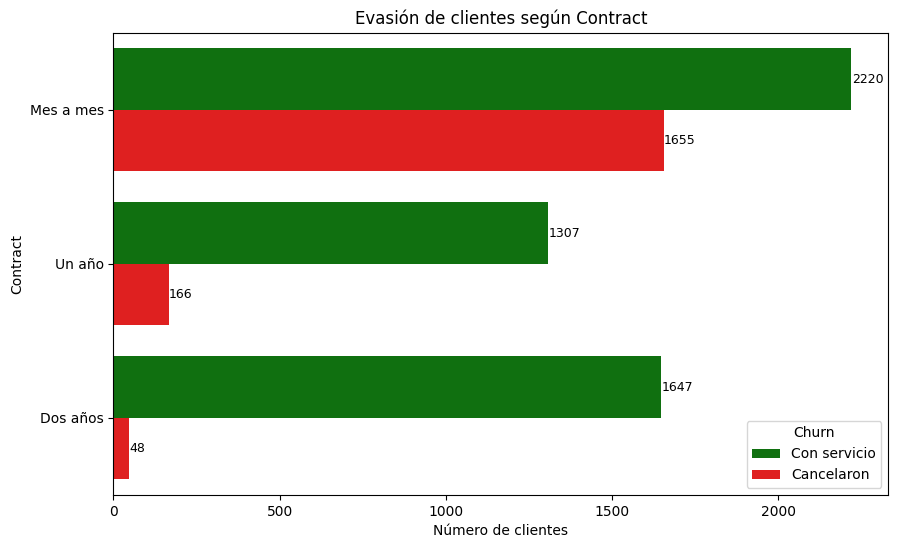


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [81]:
def plot_churn_by_category(column, labels_dict=None):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(data=df, y=column, hue='Churn', ax=ax, palette=['green', 'red'])
    ax.set_title(f'Evasión de clientes según {column}')
    ax.set_xlabel('Número de clientes')
    ax.set_ylabel(column)
    ax.legend(title='Churn', labels=['Con servicio', 'Cancelaron'])

    if labels_dict:
        unique_vals = sorted(df[column].unique())
        ax.set_yticks(unique_vals)
        ax.set_yticklabels([labels_dict[val] for val in unique_vals])

    for a in ax.patches:
      width = a.get_width()
      if width > 0:
          ax.text(width + 1, a.get_y() + a.get_height() / 2, int(width), va='center', fontsize=9, color='black')

    plt.show()
    print('\n' + '-'*180 + '\n')

labels_gender = {0: 'Hombre', 1: 'Mujer'}
labels_internet = {0: 'Sin Internet', 1: 'DSL', 2: 'Fibra Óptica'}
labels_contract = {0: 'Mes a mes', 1: 'Un año', 2: 'Dos años'}

plot_churn_by_category('gender', labels_gender)
plot_churn_by_category('InternetService', labels_internet)
plot_churn_by_category('Contract', labels_contract)


###Metodo de pago

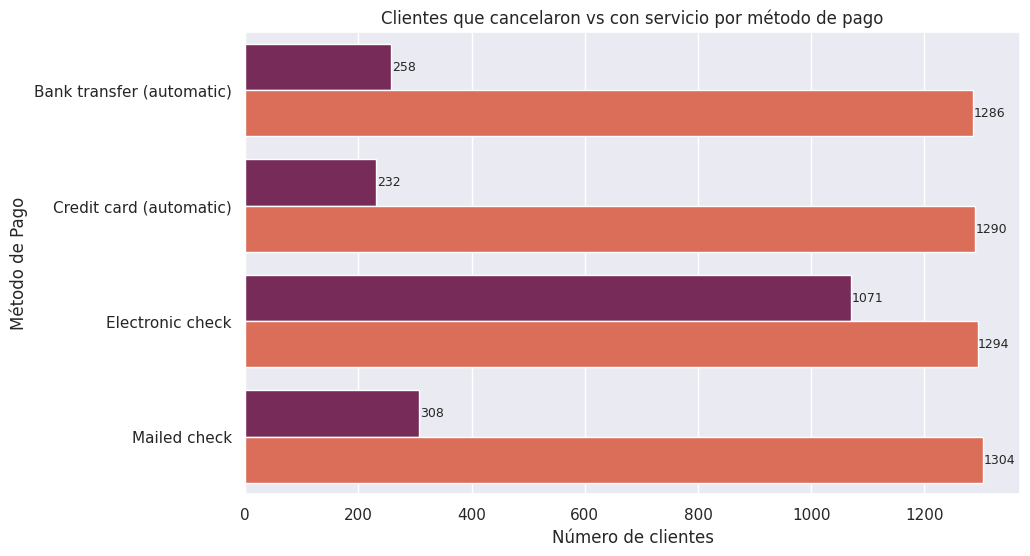

In [106]:
payment_methods = ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']

# Sumas de churn (cancelaciones)
churn_counts = [
    df.loc[df['Churn'] == 1, 'PaymentMethod_bank transfer (automatic)'].sum(),
    df.loc[df['Churn'] == 1, 'PaymentMethod_credit card (automatic)'].sum(),
    df.loc[df['Churn'] == 1, 'PaymentMethod_electronic check'].sum(),
    df.loc[df['Churn'] == 1, 'PaymentMethod_mailed check'].sum()
]

# Sumas de no churn (clientes activos)
no_churn_counts = [
    df.loc[df['Churn'] == 0, 'PaymentMethod_bank transfer (automatic)'].sum(),
    df.loc[df['Churn'] == 0, 'PaymentMethod_credit card (automatic)'].sum(),
    df.loc[df['Churn'] == 0, 'PaymentMethod_electronic check'].sum(),
    df.loc[df['Churn'] == 0, 'PaymentMethod_mailed check'].sum()
]

# Crear DataFrame para seaborn
data = pd.DataFrame({
    'PaymentMethod': payment_methods * 2,
    'Count': churn_counts + no_churn_counts,
    'ChurnStatus': ['Cancelaron'] * 4 + ['Con servicio'] * 4
})

def generargrafico(palette):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x='Count', y='PaymentMethod', hue='ChurnStatus', data=data,palette=palette, legend=False)
    plt.title('Clientes que cancelaron vs con servicio por método de pago')
    plt.xlabel('Número de clientes')
    plt.ylabel('Método de Pago')

    # Agregar números al final de cada barra
    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(width + 1, p.get_y() + p.get_height() / 2,
                    int(width), va='center', fontsize=9)


    plt.show()

generargrafico('rocket')


<ipython-input-112-e3f69d0e5619>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(payment_churn.values()), y=list(payment_churn.keys()), orient='h', palette= ['royalblue','orange','forestgreen','orchid'])


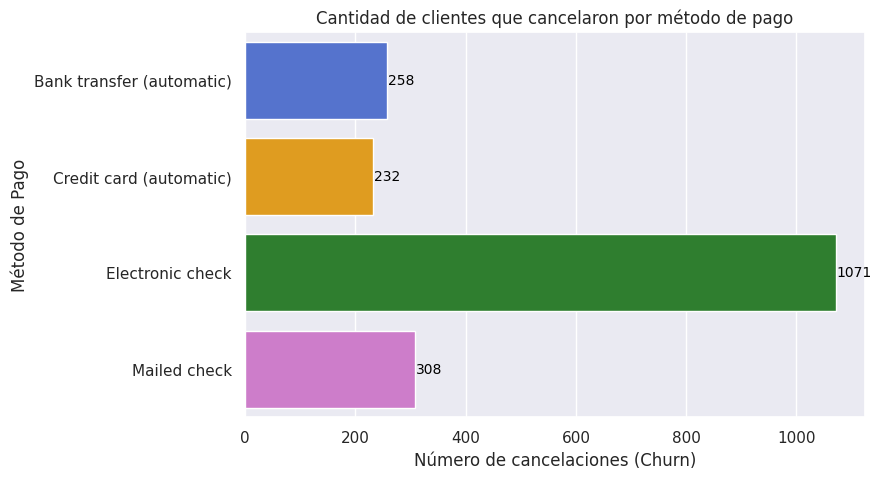

In [112]:
payment_churn = {
    'Bank transfer (automatic)': df.loc[df['Churn']==1, 'PaymentMethod_bank transfer (automatic)'].sum(),
    'Credit card (automatic)': df.loc[df['Churn']==1, 'PaymentMethod_credit card (automatic)'].sum(),
    'Electronic check': df.loc[df['Churn']==1, 'PaymentMethod_electronic check'].sum(),
    'Mailed check': df.loc[df['Churn']==1, 'PaymentMethod_mailed check'].sum()
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(payment_churn.values()), y=list(payment_churn.keys()), orient='h', palette= ['royalblue','orange','forestgreen','orchid'])
plt.title('Cantidad de clientes que cancelaron por método de pago')
plt.xlabel('Número de cancelaciones (Churn)')
plt.ylabel('Método de Pago')

for i, v in enumerate(payment_churn.values()):
    plt.text(v + 1, i, str(v), color='black', fontsize=10, va='center')

plt.show()

###Conteo de evasión por variables numéricas

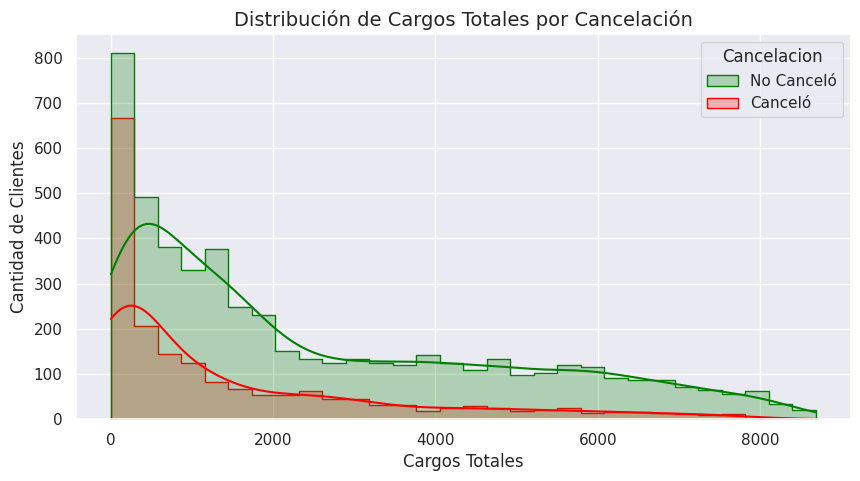

In [153]:
df['Cancelacion'] = df['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='Charges.Total', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Canceló':'green', 'Canceló':'red'}, bins=30)

ax.set_title('Distribución de Cargos Totales por Cancelación', fontsize=14)
ax.set_xlabel('Cargos Totales', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
plt.show()

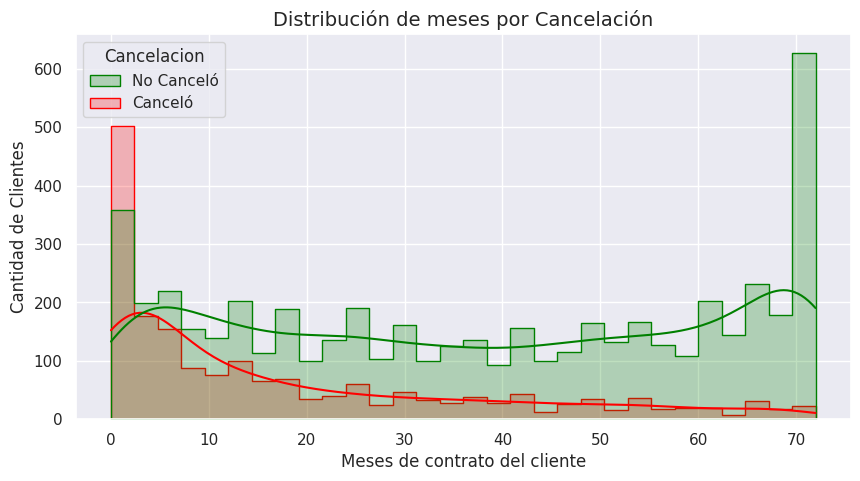

In [155]:
df['Cancelacion'] = df['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='tenure', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Canceló':'green', 'Canceló':'red'}, bins=30)

ax.set_title('Distribución de meses por Cancelación', fontsize=14)
ax.set_xlabel('Meses de contrato del cliente', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
plt.show()

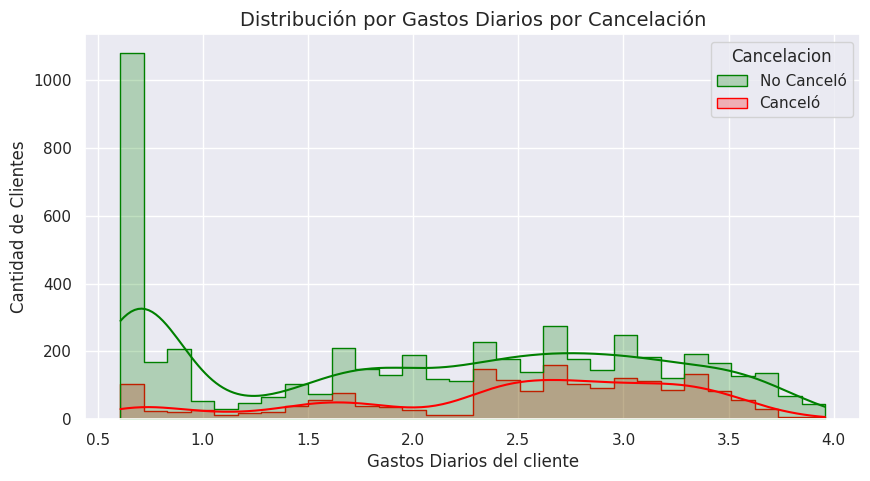

In [156]:
df['Cancelacion'] = df['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='Cuentas_Diarias', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Canceló':'green', 'Canceló':'red'}, bins=30)

ax.set_title('Distribución por Gastos Diarios por Cancelación', fontsize=14)
ax.set_xlabel('Gastos Diarios del cliente', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
plt.show()

#📄Informe final